In [1]:
import pandas as pd
df = pd.read_csv('/content/Social_Media_Advertising.csv')
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony


In [2]:
#Check if there is missing values
df.isnull().sum()

,0
Campaign_ID,0
Target_Audience,0
Campaign_Goal,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0
Language,0


In [4]:
#Cleaning up the dataset, converting Acquisition_Cost to numeric instead of string ('$')
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

#Calculate (Click through Rate) CTR = Clicks/Impressions
df['CTR'] = df['Clicks'] / df['Impressions']

# Calculate Cost Per Click (CPC) = Acquisition_Cost / Clicks
# Avoid division by zero
df['CPC'] = df['Acquisition_Cost'] / df['Clicks'].replace(0, pd.NA)

df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR,CPC
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,0.166667,1.000000
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,0.166667,1.000000
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,0.166667,1.000000
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,0.151265,1.706485
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,0.151265,1.706485


In [13]:
#Predictive Modeling

# Define high conversion as above median or set a custom threshold
threshold = df['Conversion_Rate'].median()
df['High_Conversion'] = (df['Conversion_Rate'] > threshold).astype(int)

df_cleaned = df.dropna(subset=['CPC', 'CTR'])


In [16]:
features = ['Channel_Used', 'Target_Audience', 'Language', 'Customer_Segment', 'CTR', 'CPC', 'Engagement_Score']
X = pd.get_dummies(df_cleaned[features], drop_first=True)
y = df_cleaned['High_Conversion']


In [22]:
# Check class distribution
print(y.value_counts())

# As percentage
print(y.value_counts(normalize=True) * 100)

High_Conversion
0    160792
1    139208
Name: count, dtype: int64
High_Conversion
0    53.597333
1    46.402667
Name: proportion, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # Corrected import
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,random_state=42)
log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)

# Train models
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
y_pred = rf_model.predict(X_test)

# Evaluate Logistic Regression
print("=== Logistic Regression ===")
log_conf_matrix = confusion_matrix(y_test, log_preds)
log_class_report = classification_report(y_test, log_preds)
print(log_conf_matrix)
print(log_class_report)

# Evaluate Decision Tree
print("=== Decision Tree ===")
tree_conf_matrix = confusion_matrix(y_test, tree_preds)
tree_class_report = classification_report(y_test, tree_preds)
print(tree_conf_matrix)
print(tree_class_report)

# Evaluate
print("=== Random Forest ===")
rf_conf_matrix = confusion_matrix(y_test, y_pred)
rf_class_report = classification_report(y_test, y_pred)
print(rf_conf_matrix)
print(rf_class_report)

=== Logistic Regression ===
[[32299     0]
 [27701     0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70     32299
           1       0.00      0.00      0.00     27701

    accuracy                           0.54     60000
   macro avg       0.27      0.50      0.35     60000
weighted avg       0.29      0.54      0.38     60000

=== Decision Tree ===
[[17282 15017]
 [14537 13164]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54     32299
           1       0.47      0.48      0.47     27701

    accuracy                           0.51     60000
   macro avg       0.51      0.51      0.51     60000
weighted avg       0.51      0.51      0.51     60000

=== Random Forest ===
[[32020   279]
 [27469   232]]
              precision    recall  f1-score   support

           0       0.54      0.99      0.70     32299
           1       0.45      0.01      0.02     27701

    accuracy     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


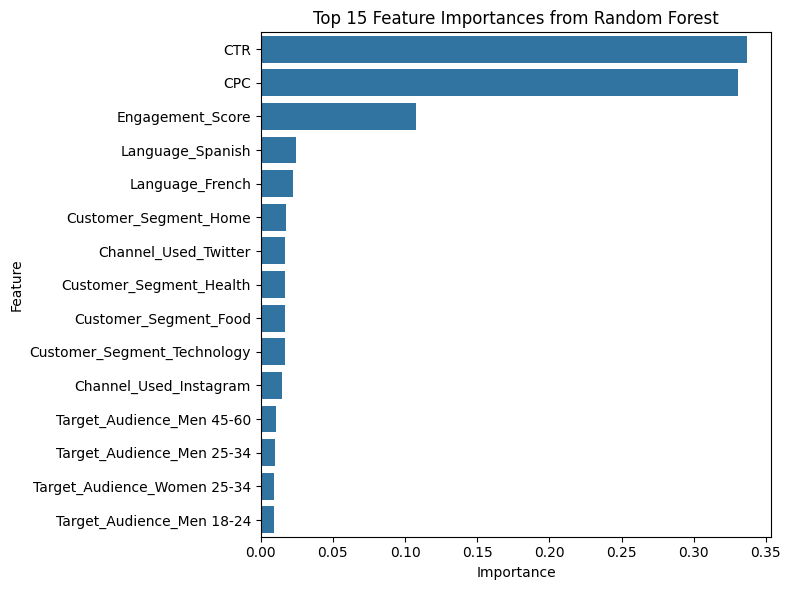

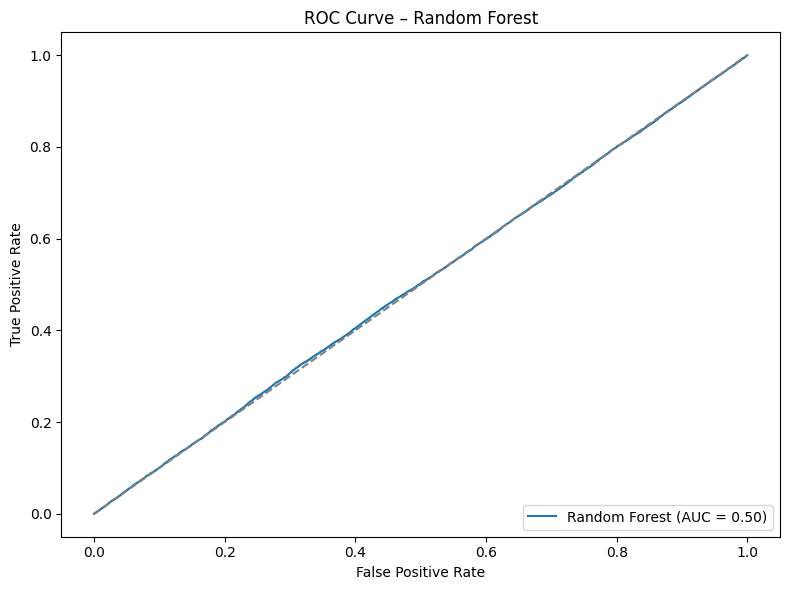

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# Get feature importances from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Top 15 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

# Compute ROC-AUC score and curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_probs)
fpr, tpr, _ = roc_curve(y_test, rf_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [37]:
# Remove CPC and CTR from the features and retrain the models
features_reduced = ['Channel_Used', 'Target_Audience', 'Language', 'Customer_Segment','Engagement_Score']
X_reduced = pd.get_dummies(df_cleaned[features_reduced], drop_first=True)
y_reduced = df_cleaned['High_Conversion']

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Retrain models without CPC and CTR
rf_model_r = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
log_model_r = LogisticRegression(max_iter=1000, random_state=42)
tree_model_r = DecisionTreeClassifier(random_state=42)

log_model_r.fit(X_train_r, y_train_r)
tree_model_r.fit(X_train_r, y_train_r)
rf_model_r.fit(X_train_r, y_train_r)

# Evaluate models
print("=== Logistic Regression (no CPC, CTR) ===")
print(confusion_matrix(y_test_r, log_model_r.predict(X_test_r)))
print(classification_report(y_test_r, log_model_r.predict(X_test_r)))

print("=== Decision Tree (no CPC, CTR) ===")
print(confusion_matrix(y_test_r, tree_model_r.predict(X_test_r)))
print(classification_report(y_test_r, tree_model_r.predict(X_test_r)))

print("=== Random Forest (no CPC, CTR) ===")
print(confusion_matrix(y_test_r, rf_model_r.predict(X_test_r)))
print(classification_report(y_test_r, rf_model_r.predict(X_test_r)))


=== Logistic Regression (no CPC, CTR) ===
[[32299     0]
 [27701     0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70     32299
           1       0.00      0.00      0.00     27701

    accuracy                           0.54     60000
   macro avg       0.27      0.50      0.35     60000
weighted avg       0.29      0.54      0.38     60000

=== Decision Tree (no CPC, CTR) ===


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[24626  7673]
 [21181  6520]]
              precision    recall  f1-score   support

           0       0.54      0.76      0.63     32299
           1       0.46      0.24      0.31     27701

    accuracy                           0.52     60000
   macro avg       0.50      0.50      0.47     60000
weighted avg       0.50      0.52      0.48     60000

=== Random Forest (no CPC, CTR) ===
[[31490   809]
 [27025   676]]
              precision    recall  f1-score   support

           0       0.54      0.97      0.69     32299
           1       0.46      0.02      0.05     27701

    accuracy                           0.54     60000
   macro avg       0.50      0.50      0.37     60000
weighted avg       0.50      0.54      0.39     60000

